
# Kowshik P 

## ML Clustering assignment submitted on 02-May-2022
## -----------------------------------------------------------------------------
## Model Implemented - Mean Shift and Random Forest
## Metric - Confusion Matrix (Accuracy_score)
## Accuracy Rate of Model : 0.94
## Type - 1 error: 1
## Type - 2 error: 3 
## Performance - Good
## -----------------------------------------------------------------------------


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as mat;


In [2]:
dataset = pd.read_csv("Mall_Customers.csv");

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
independent = dataset.iloc[:, [3, 4]].values;

#independent

In [4]:
from sklearn.cluster import MeanShift;

#from itertools import cycle;

#colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk");



#from sklearn.datasets import make_blobs;
#make_blobs(independent);

#import scipy.cluster.hierarchy as sch;

#sch.make_blobs(independent);

for values in range(1, 11):
    meanST = MeanShift(bandwidth = values);
    meanST.fit(independent);

#mat.plot(range(1, 11), colors);
#mat.title("Estimated No.of Clusters");
#mat.show()





In [5]:
from sklearn.cluster import MeanShift;

meanST = MeanShift(bandwidth = values);

y_meanST = meanST.fit_predict(independent);
 
y_meanST

array([ 9,  6,  7,  6,  9,  6,  7, 15,  7,  6,  7, 15,  7,  6,  7,  6,  9,
        6,  9, 15,  9,  6,  7,  6, 14, 12,  9,  6, 10, 12,  7,  6,  7, 12,
       14, 12, 14,  6, 10, 12, 10, 12, 10,  1, 10,  1,  1,  1, 10, 10,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  3,  5,  0,  2,  4,  5,  4,  5,  0,  5,  4,  2,
        4,  5,  4,  5,  4,  2,  0,  2,  4,  2,  3,  5,  3,  2,  3,  2,  3,
        5,  3,  2,  4,  5,  4,  5,  3,  2,  4,  2,  3,  5,  3,  2,  3, 17,
        3,  5,  3,  8,  3,  8,  3,  5, 11,  8, 13,  8, 11,  8, 13,  8, 11,
       17, 11,  8, 11, 17, 23, 22, 21, 16, 20, 16, 19, 18], dtype=int64)

In [6]:
supervised = pd.DataFrame(dataset);

supervised["Cluster_Group"] = y_meanST;

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,9
1,2,Male,21,15,81,6
2,3,Female,20,16,6,7
3,4,Female,23,16,77,6
4,5,Female,31,17,40,9
...,...,...,...,...,...,...
195,196,Female,35,120,79,16
196,197,Female,45,126,28,20
197,198,Male,32,126,74,16
198,199,Male,32,137,18,19


In [7]:
supervised.to_csv("cluster_csv", index = False);

C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


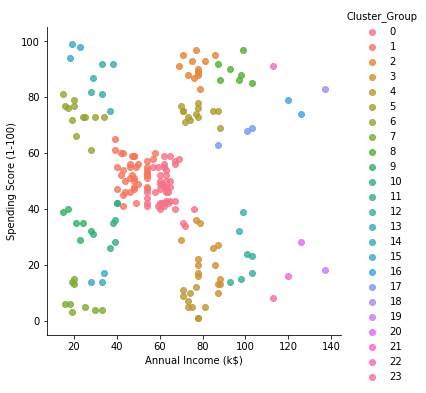

In [8]:
import seaborn as sns;

facet = sns.lmplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5], 
          fit_reg = False, legend = True, legend_out = True);

In [9]:
dependent = supervised.iloc[:,[5]].values;

In [10]:
from sklearn.model_selection import train_test_split;

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 6);

In [11]:
from sklearn.preprocessing import StandardScaler;

standardization = StandardScaler();

x_train = standardization.fit_transform(x_train);

x_test = standardization.transform(x_test);


In [12]:
from sklearn.ensemble import RandomForestClassifier;

randomForestClassifier = RandomForestClassifier();

randomForestClassifier.fit(x_train, y_train);


C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [13]:
y_pred = randomForestClassifier.predict(x_test);

In [14]:
from sklearn.metrics import confusion_matrix;

randamForestConfusionMatrix = confusion_matrix(y_test, y_pred);

print(randamForestConfusionMatrix);


[[17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]]


In [15]:
from sklearn.metrics import classification_report;

randamForestClassifierReport = classification_report(y_test, y_pred);

print(randamForestClassifierReport);

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.87      1.00      0.93        13
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         4
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         1

    accuracy                           0.94        67
   macro avg       0.90   

C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Metric(Accuracy Score)
## The best performance is 1

In [16]:
from sklearn.metrics import accuracy_score;

RandomForestClassifierAccuracy = accuracy_score(y_test, y_pred);

print(RandomForestClassifierAccuracy)

0.9402985074626866
